In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3676719637284785720
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4850712576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2484911363704864290
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
path = "D:/Dataset/Store Sales"
train = pd.read_csv(path + '/train.csv', parse_dates=["date"]).copy()
test = pd.read_csv(path + '/test.csv', parse_dates=["date"]).copy()
holidays_events = pd.read_csv(path + '/holidays_events.csv', parse_dates=["date"]).copy()
oil = pd.read_csv(path + '/oil.csv', parse_dates=["date"]).copy()
sample_submission = pd.read_csv(path + '/sample_submission.csv')
stores = pd.read_csv(path + '/stores.csv')
transactions = pd.read_csv(path + '/transactions.csv', parse_dates=["date"]).copy()

In [3]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [11]:
show_isna = [train, holidays_events, oil, stores, transactions, test]
show_isna_name = ['train', 'holidays_events', 'oil', 'stores', 'transactions', 'test']

for i in range(0, len(show_isna)):
    print('Dataset Name : ' + show_isna_name[i])
    print(show_isna[i].isna().sum())
    print('------------------------------')

Dataset Name : train
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
------------------------------
Dataset Name : holidays_events
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
------------------------------
Dataset Name : oil
date           0
dcoilwtico    43
dtype: int64
------------------------------
Dataset Name : stores
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
------------------------------
Dataset Name : transactions
date            0
store_nbr       0
transactions    0
dtype: int64
------------------------------
Dataset Name : test
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
------------------------------


In [12]:
def change_date(data):
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    return data

In [24]:
# country, store, product 1주 간격으로 재정렬(num_sold 합)
weekly_df = train.groupby(['store_nbr', 'family', pd.Grouper(key = 'date', freq = 'W')])["sales"].sum().rename("sales").reset_index()

# country, store, product 1달 간격으로 재정렬(num_sold 합)
monthly_df = train.groupby(["store_nbr","family", pd.Grouper(key="date", freq="MS")])["sales"].sum().rename("sales").reset_index()
weekly_df.head(5)

,store_nbr,family,date,sales
0,1,AUTOMOTIVE,2013-01-06,15.0
1,1,AUTOMOTIVE,2013-01-13,13.0
2,1,AUTOMOTIVE,2013-01-20,13.0
3,1,AUTOMOTIVE,2013-01-27,16.0
4,1,AUTOMOTIVE,2013-02-03,14.0


In [25]:
monthly_df

,store_nbr,family,date,sales
0,1,AUTOMOTIVE,2013-01-01,68.0
1,1,AUTOMOTIVE,2013-02-01,38.0
2,1,AUTOMOTIVE,2013-03-01,59.0
3,1,AUTOMOTIVE,2013-04-01,66.0
4,1,AUTOMOTIVE,2013-05-01,79.0
...,...,...,...,...
99787,54,SEAFOOD,2017-04-01,59.0
99788,54,SEAFOOD,2017-05-01,97.0
99789,54,SEAFOOD,2017-06-01,80.0
99790,54,SEAFOOD,2017-07-01,97.0


In [35]:
def plot_all(df):
    f, axes = plt.subplots(11, 3, sharex = True, sharey = True)
    f.tight_layout()
    for n, prod in enumerate(df['store_nbr'].unique()):
        plot_df = df.loc[df['store_nbr'] == prod]
        sns.lineplot(data = plot_df, x = 'date', y = 'sales', hue = 'family', ax = axes[n // 11, n% 3])
        axes[n // 11, n % 3].set_title("Store_nbr: "+str(prod))

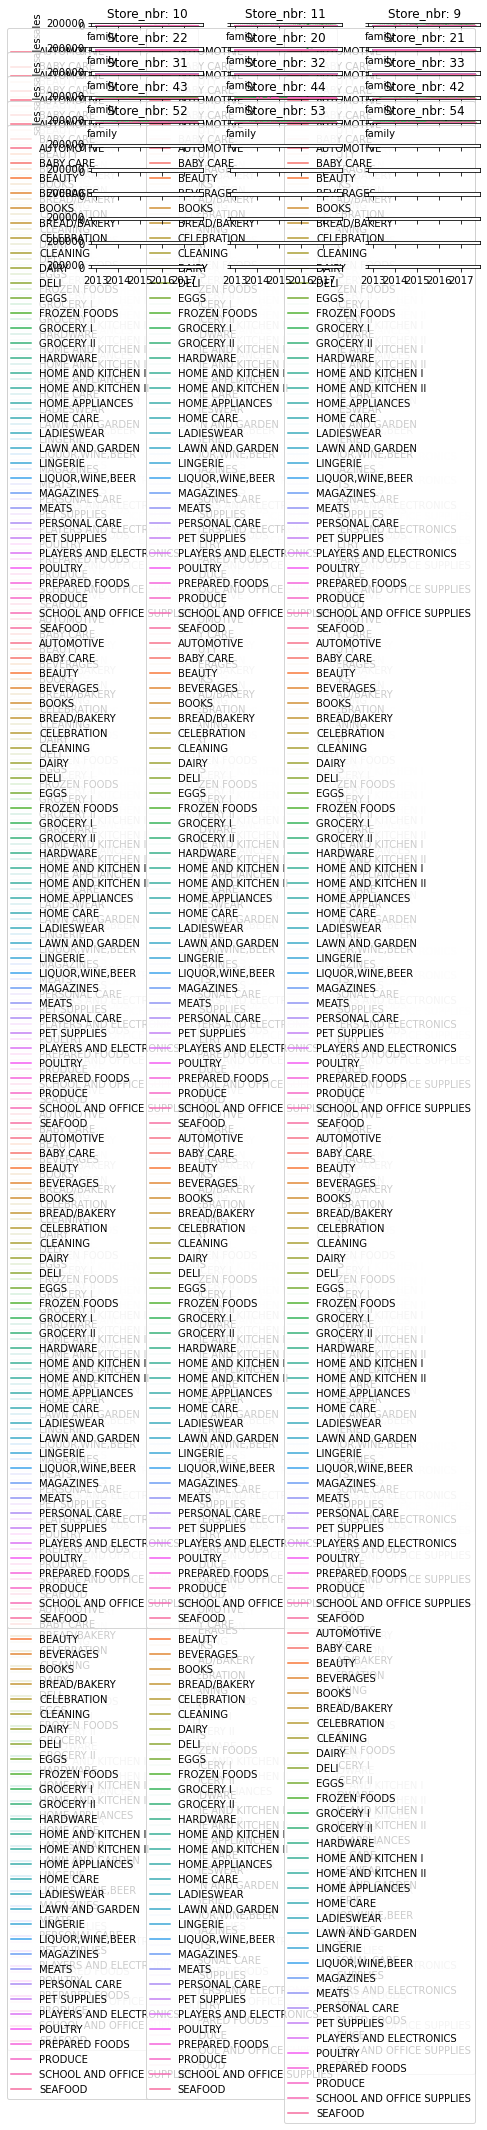

In [36]:
plot_all(weekly_df)

## store_nbr

In [13]:
train_store_nbr = train.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()
train_store_nbr

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


In [32]:
print(train.groupby(['date', 'store_nbr'])['sales'].count()) #store_nbr 개수 54이므로 맞다

date        store_nbr
2013-01-01  1            33
            2            33
            3            33
            4            33
            5            33
                         ..
2017-08-15  50           33
            51           33
            52           33
            53           33
            54           33
Name: sales, Length: 90936, dtype: int64


<AxesSubplot:xlabel='date', ylabel='sales'>

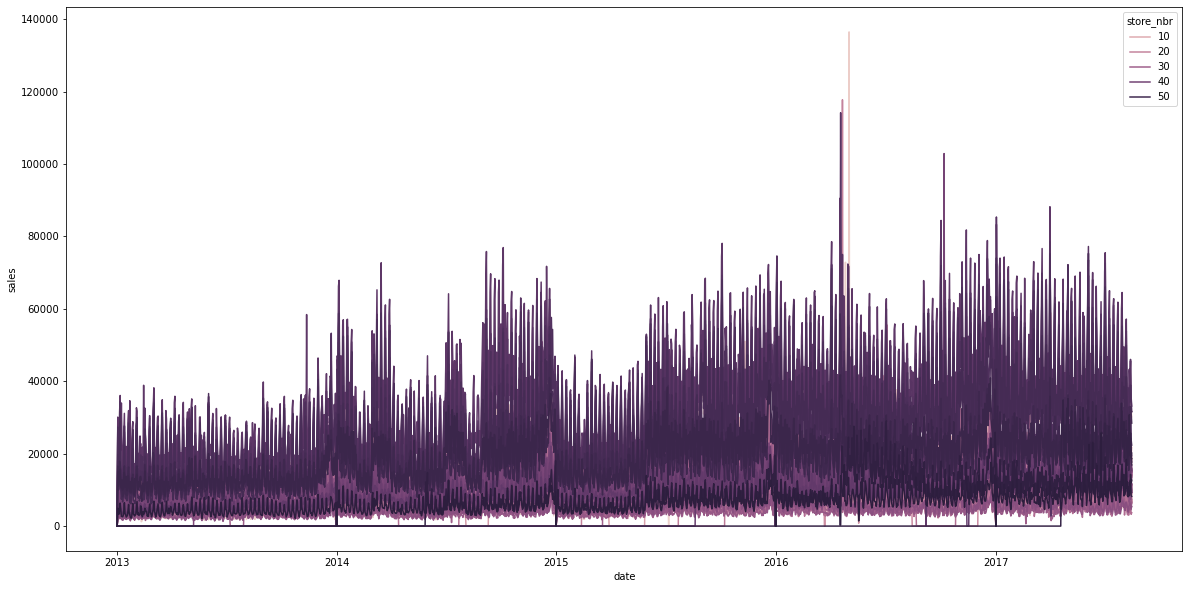

In [23]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(data=train_store_nbr, x = 'date', y = 'sales', hue = 'store_nbr')

KeyboardInterrupt: 

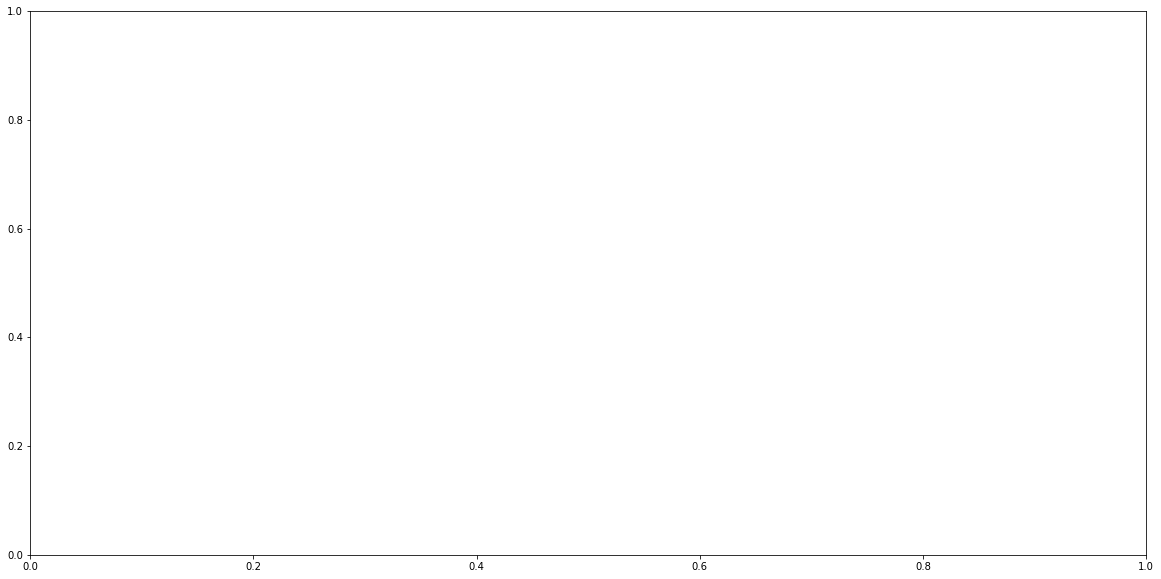

In [445]:
f, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data=train, x = 'sales', hue = 'store_nbr')

## Oil Nan값 처리

In [348]:
oil = change_date(oil)
oil_train = oil.copy()
oil_train = oil_train.dropna()
oil_train

,date,dcoilwtico,year,month,day,dayofweek,quarter
1,2013-01-02,93.14,2013,1,2,2,1
2,2013-01-03,92.97,2013,1,3,3,1
3,2013-01-04,93.12,2013,1,4,4,1
4,2013-01-07,93.20,2013,1,7,0,1
5,2013-01-08,93.21,2013,1,8,1,1
...,...,...,...,...,...,...,...
1213,2017-08-25,47.65,2017,8,25,4,3
1214,2017-08-28,46.40,2017,8,28,0,3
1215,2017-08-29,46.46,2017,8,29,1,3
1216,2017-08-30,45.96,2017,8,30,2,3


In [349]:
oil_test = oil[oil['dcoilwtico'].isnull()].reset_index()
oil_test

,index,date,dcoilwtico,year,month,day,dayofweek,quarter
0,0,2013-01-01,NaN,2013,1,1,1,1
1,14,2013-01-21,NaN,2013,1,21,0,1
2,34,2013-02-18,NaN,2013,2,18,0,1
3,63,2013-03-29,NaN,2013,3,29,4,1
4,104,2013-05-27,NaN,2013,5,27,0,2
5,132,2013-07-04,NaN,2013,7,4,3,3
6,174,2013-09-02,NaN,2013,9,2,0,3
7,237,2013-11-28,NaN,2013,11,28,3,4
8,256,2013-12-25,NaN,2013,12,25,2,4
9,261,2014-01-01,NaN,2014,1,1,2,1


In [350]:
from catboost import CatBoostRegressor
oil_x_train = oil_train.drop(['dcoilwtico', 'date'], axis = 1)
oil_y_train = oil_train['dcoilwtico'].copy()

oil_predict = oil_test.drop(['dcoilwtico', 'date'], axis = 1)

oil_model = CatBoostRegressor(random_state = 42)
oil_model.fit(oil_x_train, oil_y_train)

Learning rate set to 0.042
0:	learn: 24.6475898	total: 570us	remaining: 570ms
1:	learn: 23.7786232	total: 1.27ms	remaining: 634ms
2:	learn: 22.8991609	total: 1.79ms	remaining: 597ms
3:	learn: 22.0844915	total: 2.26ms	remaining: 563ms
4:	learn: 21.2921791	total: 2.92ms	remaining: 581ms
5:	learn: 20.5408580	total: 3.33ms	remaining: 552ms
6:	learn: 19.7738004	total: 3.84ms	remaining: 545ms
7:	learn: 19.0630961	total: 4.51ms	remaining: 560ms
8:	learn: 18.3759888	total: 5.14ms	remaining: 566ms
9:	learn: 17.7541487	total: 5.99ms	remaining: 593ms
10:	learn: 17.1427476	total: 6.53ms	remaining: 587ms
11:	learn: 16.5568856	total: 7.16ms	remaining: 589ms
12:	learn: 15.9939130	total: 7.76ms	remaining: 589ms
13:	learn: 15.4836912	total: 8.34ms	remaining: 588ms
14:	learn: 14.9437143	total: 8.79ms	remaining: 577ms
15:	learn: 14.4595224	total: 9.17ms	remaining: 564ms
16:	learn: 14.0001401	total: 9.61ms	remaining: 556ms
17:	learn: 13.5348817	total: 10.1ms	remaining: 551ms
18:	learn: 13.1339422	total: 1

243:	learn: 1.6940597	total: 149ms	remaining: 460ms
244:	learn: 1.6897828	total: 149ms	remaining: 460ms
245:	learn: 1.6876859	total: 150ms	remaining: 459ms
246:	learn: 1.6841087	total: 151ms	remaining: 459ms
247:	learn: 1.6808473	total: 151ms	remaining: 458ms
248:	learn: 1.6774366	total: 152ms	remaining: 458ms
249:	learn: 1.6751546	total: 152ms	remaining: 457ms
250:	learn: 1.6718610	total: 153ms	remaining: 457ms
251:	learn: 1.6685269	total: 154ms	remaining: 456ms
252:	learn: 1.6657588	total: 154ms	remaining: 455ms
253:	learn: 1.6633678	total: 155ms	remaining: 455ms
254:	learn: 1.6608615	total: 155ms	remaining: 454ms
255:	learn: 1.6568629	total: 156ms	remaining: 454ms
256:	learn: 1.6529780	total: 157ms	remaining: 453ms
257:	learn: 1.6508464	total: 157ms	remaining: 452ms
258:	learn: 1.6464410	total: 158ms	remaining: 452ms
259:	learn: 1.6437736	total: 159ms	remaining: 451ms
260:	learn: 1.6399046	total: 159ms	remaining: 451ms
261:	learn: 1.6376129	total: 160ms	remaining: 450ms
262:	learn: 

497:	learn: 1.2324801	total: 310ms	remaining: 312ms
498:	learn: 1.2317830	total: 311ms	remaining: 312ms
499:	learn: 1.2298448	total: 311ms	remaining: 311ms
500:	learn: 1.2288927	total: 312ms	remaining: 311ms
501:	learn: 1.2277801	total: 313ms	remaining: 310ms
502:	learn: 1.2271250	total: 313ms	remaining: 309ms
503:	learn: 1.2261186	total: 314ms	remaining: 309ms
504:	learn: 1.2251685	total: 315ms	remaining: 308ms
505:	learn: 1.2247610	total: 315ms	remaining: 308ms
506:	learn: 1.2231472	total: 316ms	remaining: 307ms
507:	learn: 1.2219678	total: 316ms	remaining: 306ms
508:	learn: 1.2209608	total: 317ms	remaining: 306ms
509:	learn: 1.2192452	total: 318ms	remaining: 305ms
510:	learn: 1.2184789	total: 318ms	remaining: 305ms
511:	learn: 1.2173550	total: 319ms	remaining: 304ms
512:	learn: 1.2166816	total: 320ms	remaining: 303ms
513:	learn: 1.2157902	total: 320ms	remaining: 303ms
514:	learn: 1.2148869	total: 321ms	remaining: 302ms
515:	learn: 1.2132558	total: 321ms	remaining: 302ms
516:	learn: 

751:	learn: 1.0162983	total: 469ms	remaining: 155ms
752:	learn: 1.0154611	total: 470ms	remaining: 154ms
753:	learn: 1.0144760	total: 471ms	remaining: 154ms
754:	learn: 1.0136543	total: 471ms	remaining: 153ms
755:	learn: 1.0129237	total: 472ms	remaining: 152ms
756:	learn: 1.0126122	total: 472ms	remaining: 152ms
757:	learn: 1.0119918	total: 473ms	remaining: 151ms
758:	learn: 1.0114887	total: 474ms	remaining: 150ms
759:	learn: 1.0102838	total: 474ms	remaining: 150ms
760:	learn: 1.0097928	total: 475ms	remaining: 149ms
761:	learn: 1.0093889	total: 476ms	remaining: 149ms
762:	learn: 1.0087110	total: 476ms	remaining: 148ms
763:	learn: 1.0083097	total: 477ms	remaining: 147ms
764:	learn: 1.0074586	total: 478ms	remaining: 147ms
765:	learn: 1.0067837	total: 478ms	remaining: 146ms
766:	learn: 1.0061880	total: 479ms	remaining: 145ms
767:	learn: 1.0052494	total: 479ms	remaining: 145ms
768:	learn: 1.0047162	total: 480ms	remaining: 144ms
769:	learn: 1.0044167	total: 481ms	remaining: 144ms
770:	learn: 

In [351]:
oil_pred = oil_model.predict(oil_test)
oil_pred

array([ 94.02696493,  95.35272561,  95.6699055 ,  95.83650698,
        94.44103084, 103.05301892, 105.96991328,  92.44062229,
        98.17969939,  93.49756781,  96.02366219, 101.80246662,
       102.42686606, 104.10519663, 103.11144854,  94.00184142,
        71.77562228,  56.05309531,  52.10472777,  45.8642335 ,
        49.89275162,  51.47450132,  57.60726128,  54.52020079,
        45.9251353 ,  40.94719727,  36.85388006,  36.82030022,
        29.61606046,  29.76789441,  38.24136891,  48.40199223,
        45.64006235,  43.63898596,  47.24280368,  52.17063207,
        53.47299691,  51.61734784,  53.27698058,  51.59837392,
        49.36485777,  47.11274706,  46.18638818])

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

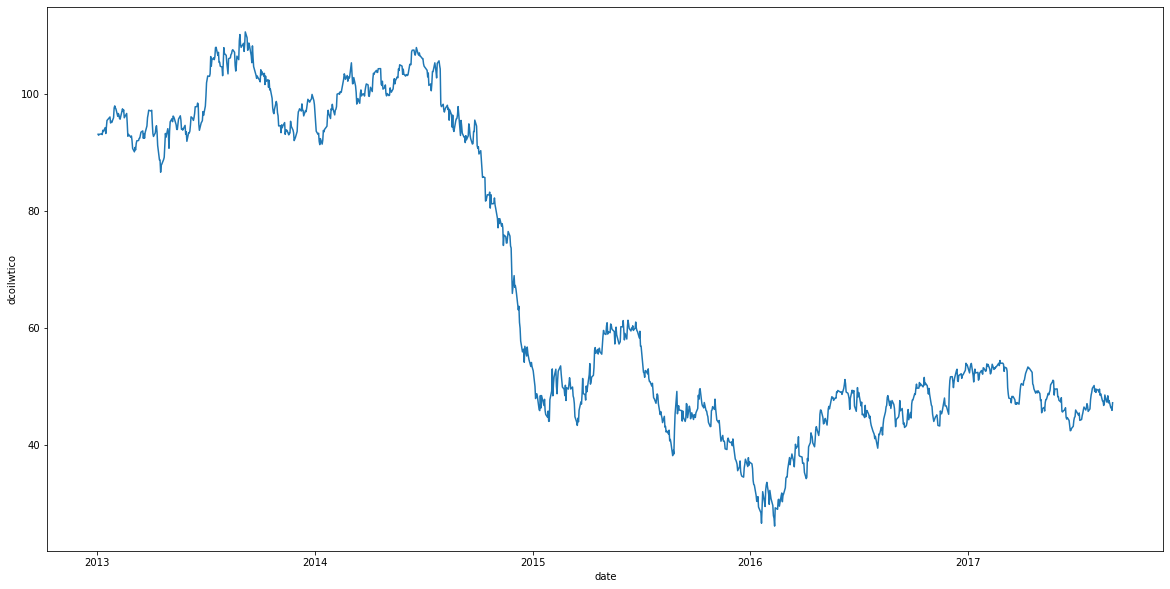

In [352]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')

In [353]:
oil = oil.fillna(0)
oil

,date,dcoilwtico,year,month,day,dayofweek,quarter
0,2013-01-01,0.00,2013,1,1,1,1
1,2013-01-02,93.14,2013,1,2,2,1
2,2013-01-03,92.97,2013,1,3,3,1
3,2013-01-04,93.12,2013,1,4,4,1
4,2013-01-07,93.20,2013,1,7,0,1
...,...,...,...,...,...,...,...
1213,2017-08-25,47.65,2017,8,25,4,3
1214,2017-08-28,46.40,2017,8,28,0,3
1215,2017-08-29,46.46,2017,8,29,1,3
1216,2017-08-30,45.96,2017,8,30,2,3


In [354]:
k = 0
for i in range(0, len(oil)):
    if oil['dcoilwtico'][i] == 0:
        oil['dcoilwtico'][i] = oil_pred[k]
        k +=1
oil        

C:\Users\cym80\AppData\Local\Temp\ipykernel_17040\2592380612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil['dcoilwtico'][i] = oil_pred[k]


,date,dcoilwtico,year,month,day,dayofweek,quarter
0,2013-01-01,94.026965,2013,1,1,1,1
1,2013-01-02,93.140000,2013,1,2,2,1
2,2013-01-03,92.970000,2013,1,3,3,1
3,2013-01-04,93.120000,2013,1,4,4,1
4,2013-01-07,93.200000,2013,1,7,0,1
...,...,...,...,...,...,...,...
1213,2017-08-25,47.650000,2017,8,25,4,3
1214,2017-08-28,46.400000,2017,8,28,0,3
1215,2017-08-29,46.460000,2017,8,29,1,3
1216,2017-08-30,45.960000,2017,8,30,2,3


<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

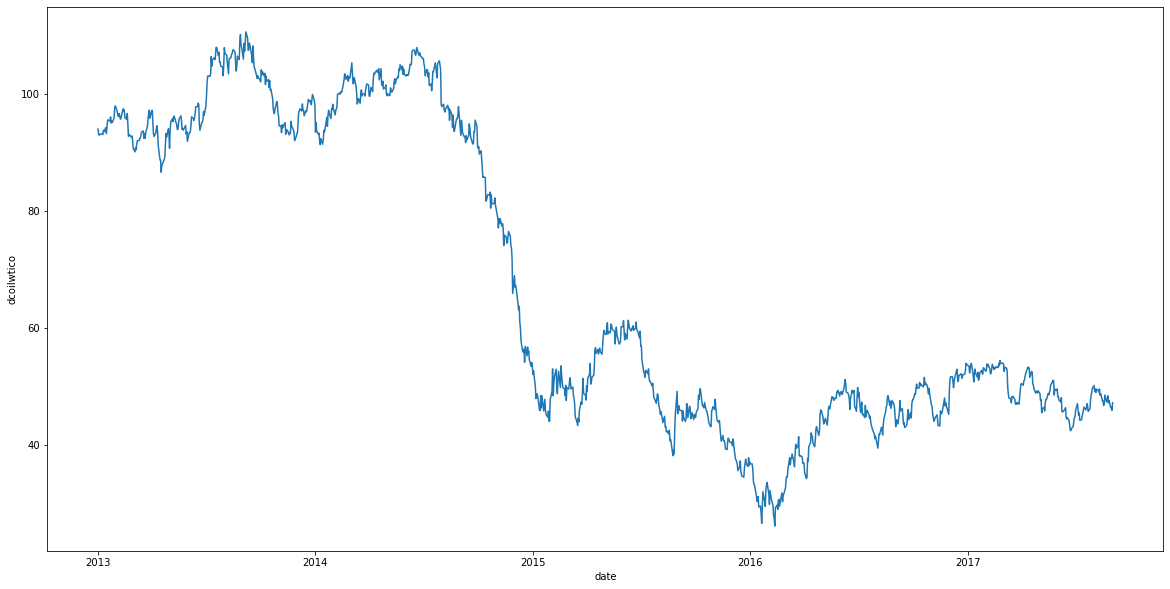

In [355]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(data = oil, x = 'date', y = 'dcoilwtico')

## holidays_events에서 날짜만 추려서 쉬는 날 구분

In [364]:
holiday = holidays_events.copy()
holiday

,date,type,locale,locale_name,description,transferred,year,month,day,dayofweek,quarter
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,2012,3,2,4,1
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2012,4,1,6,2
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2012,4,12,3,2
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2012,4,14,5,2
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2012,4,21,5,2
...,...,...,...,...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,2017,12,22,4,4
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,2017,12,23,5,4
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,2017,12,24,6,4
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,2017,12,25,0,4


In [368]:
holiday_date = holiday.groupby(['date']).sum().reset_index()
holiday_date

,date,transferred,year,month,day,dayofweek,quarter
0,2012-03-02,0,2012,3,2,4,1
1,2012-04-01,0,2012,4,1,6,2
2,2012-04-12,0,2012,4,12,3,2
3,2012-04-14,0,2012,4,14,5,2
4,2012-04-21,0,2012,4,21,5,2
...,...,...,...,...,...,...,...
307,2017-12-22,0,4034,24,44,8,8
308,2017-12-23,0,2017,12,23,5,4
309,2017-12-24,0,2017,12,24,6,4
310,2017-12-25,0,2017,12,25,0,4


In [369]:
holiday_date = holiday_date['date'].copy()
holiday_date = pd.DataFrame(holiday_date)
holiday_date

,date
0,2012-03-02
1,2012-04-01
2,2012-04-12
3,2012-04-14
4,2012-04-21
...,...
307,2017-12-22
308,2017-12-23
309,2017-12-24
310,2017-12-25


In [372]:
holiday_date['holiday'] = 1

In [373]:
holiday_date

,date,holiday
0,2012-03-02,1
1,2012-04-01,1
2,2012-04-12,1
3,2012-04-14,1
4,2012-04-21,1
...,...,...
307,2017-12-22,1
308,2017-12-23,1
309,2017-12-24,1
310,2017-12-25,1


In [375]:
train_holiday_event = train.copy()
train_holiday_event

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,quarter
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,3
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,3
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,3
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,3


In [376]:
train_holiday_event = train_holiday_event.merge(holiday_date, on = ['date'], how = 'left')
train_holiday_event

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,quarter,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,1,1.0
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,1,1.0
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,1,1.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,1,1.0
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,3,1.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,3,1.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,3,1.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,3,1.0


In [384]:
train_holiday_event['holiday'] = train_holiday_event['holiday'].fillna(0)
train_holiday_event

,id,date,store_nbr,family,sales,onpromotion,year,month,day,dayofweek,quarter,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,1,1.0
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,1,1.0
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,1,1.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,1,1.0
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,3,1.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,3,1.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,3,1.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,3,1.0


In [385]:
train_holiday_event.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
month          0
day            0
dayofweek      0
quarter        0
holiday        0
dtype: int64

In [400]:
train.groupby(['date', 'family']).sum().reset_index()

,date,family,id,store_nbr,sales,onpromotion,year,month,day,dayofweek,quarter
0,2013-01-01,AUTOMOTIVE,47223,1485,0.000000,0,108702,54,54,54,54
1,2013-01-01,BABY CARE,47277,1485,0.000000,0,108702,54,54,54,54
2,2013-01-01,BEAUTY,47331,1485,2.000000,0,108702,54,54,54,54
3,2013-01-01,BEVERAGES,47385,1485,810.000000,0,108702,54,54,54,54
4,2013-01-01,BOOKS,47439,1485,0.000000,0,108702,54,54,54,54
...,...,...,...,...,...,...,...,...,...,...,...
55567,2017-08-15,POULTRY,162000459,1485,17586.709986,6,108918,432,810,54,162
55568,2017-08-15,PREPARED FOODS,162000513,1485,4641.522980,9,108918,432,810,54,162
55569,2017-08-15,PRODUCE,162000567,1485,125108.971000,3169,108918,432,810,54,162
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,162000621,1485,2530.000000,148,108918,432,810,54,162


In [28]:
count = 0
transfer_check = []
for i in range(len(holidays_events)):
    if holidays_events['type'][i] == 'Transfer':
        count += 1
        transfer_check.append(holidays_events['transferred'][i])
print(count)
print(transfer_check)
#itransferred True- > 공휴일이 다른날로 옯겨짐 -> 

12
[False, False, False, False, False, False, False, False, False, False, False, False]


In [29]:
sample_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [13]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [14]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [30]:
df_train = []
holidays_events = holidays_events.rename({'type' : 'holiday'}, axis = 1)
df_train = train.merge(holidays_events, on = 'date', how = 'left')
df_train = df_train.merge(oil, on = 'date', how = 'left')
df_train = df_train.merge(stores, on = 'store_nbr', how = 'left')
df_train = df_train.merge(transactions, on = ['date', 'store_nbr'], how = 'left')

In [31]:
df_train[:2]

,id,date,store_nbr,family,sales,onpromotion,holiday,locale,locale_name,description,transferred,dcoilwtico,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [32]:
df_train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday         2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
city                  0
state                 0
type                  0
cluster               0
transactions     249117
dtype: int64

In [36]:
df_train['holiday'] = df_train['holiday'].fillna('Weekday')
df_train['locale'] = df_train['locale'].fillna('Weekday')
df_train['locale_name'] = df_train['locale_name'].fillna('Weekday')
df_train['description'] = df_train['description'].fillna('Weekday')
df_train['transferred'] = df_train['transferred'].fillna(False)

df_train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday              0
locale               0
locale_name          0
description          0
transferred          0
dcoilwtico      955152
city                 0
state                0
type                 0
cluster              0
transactions    249117
dtype: int64

In [18]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [19]:
df_train

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0


In [20]:
df_train.rename(columns = {'type_x' : 'holiday'}, inplace = True)
df_train

,id,date,store_nbr,family,sales,onpromotion,holiday,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2155.0


In [21]:
df_train.loc[df_train['holiday'] != df_train['holiday'], 'holiday'] = 'Weekday'
df_train.loc[df_train['locale'] != df_train['locale'], 'locale'] = 'Week'
df_train.loc[df_train['locale_name'] != df_train['locale_name'], 'locale_name'] = 'Week'
df_train.loc[df_train['description'] != df_train['description'], 'description'] = 'Week'
df_train.loc[df_train['transferred'] != df_train['transferred'], 'transferred'] = 'False'

In [22]:
df_train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
holiday              0
locale               0
locale_name          0
description          0
transferred          0
dcoilwtico      955152
city                 0
state                0
type_y               0
cluster              0
transactions    249117
dtype: int64

In [27]:
df_train[0:10000]

,id,date,store_nbr,family,sales,onpromotion,holiday,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.00,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2013-01-06,39,PREPARED FOODS,47.00,0,Weekday,Week,Week,Week,False,NaN,Cuenca,Azuay,B,6,1571.0
9996,9996,2013-01-06,39,PRODUCE,0.00,0,Weekday,Week,Week,Week,False,NaN,Cuenca,Azuay,B,6,1571.0
9997,9997,2013-01-06,39,SCHOOL AND OFFICE SUPPLIES,0.00,0,Weekday,Week,Week,Week,False,NaN,Cuenca,Azuay,B,6,1571.0
9998,9998,2013-01-06,39,SEAFOOD,19.54,0,Weekday,Week,Week,Week,False,NaN,Cuenca,Azuay,B,6,1571.0
